In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt          
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline     
sns.set(color_codes=True)
colors = ['red', 'royalblue','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [2]:
df = pd.read_csv('./bank-additional-full.csv', sep=';')

In [3]:
print("Bank marketing dataset consists of {rows} rows.".format(rows = len(df)))

Bank marketing dataset consists of 41188 rows.


In [4]:
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [5]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [6]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

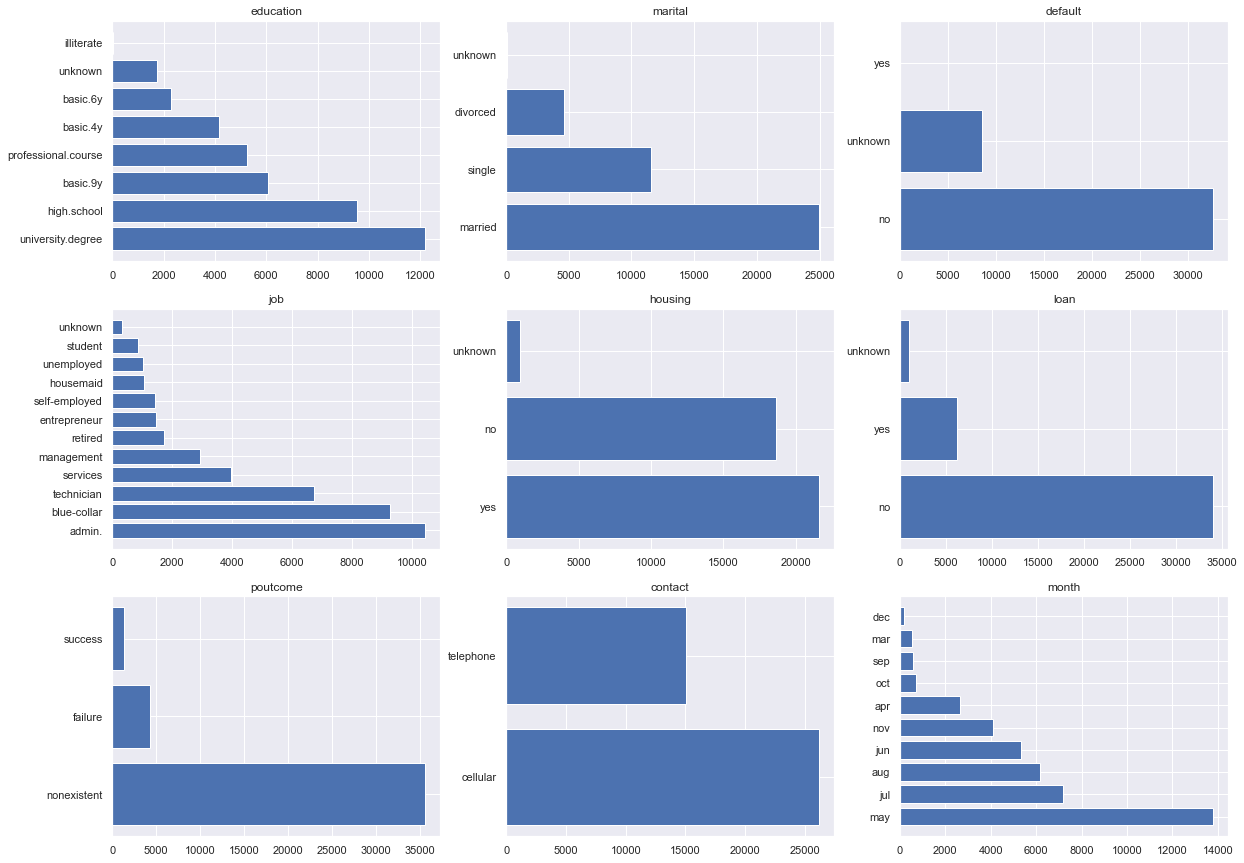

In [9]:
cat_columns = ['education', 'marital', 'default', 'job', 'housing', 'loan', 'poutcome', 'contact', 'month']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].barh(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    counter += 1

plt.show()

In [10]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

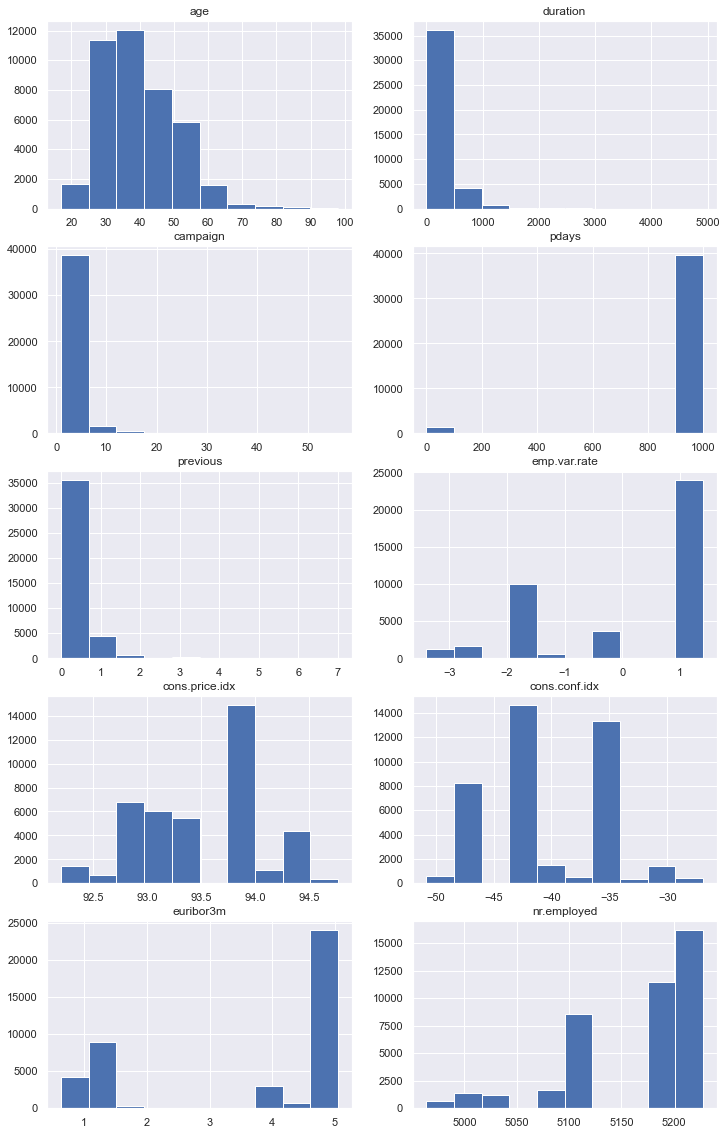

In [36]:
num_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

fig, axs = plt.subplots(5, 2, sharex=False, sharey=False, figsize=(12, 20))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 2
    trace_y = counter % 2
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

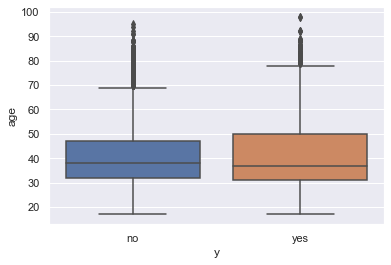

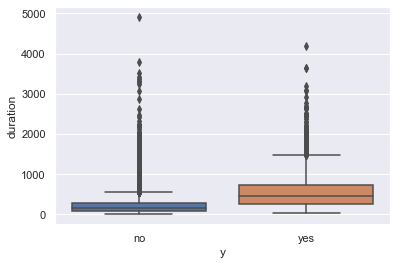

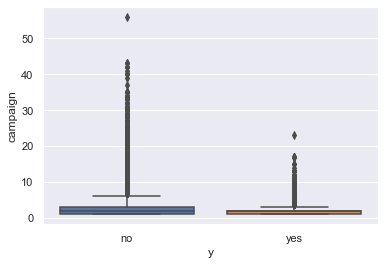

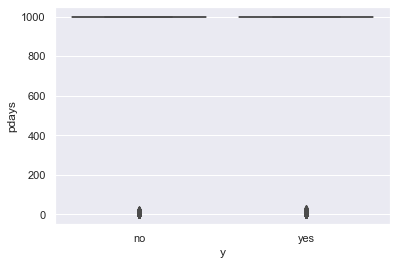

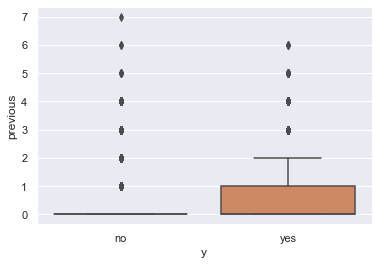

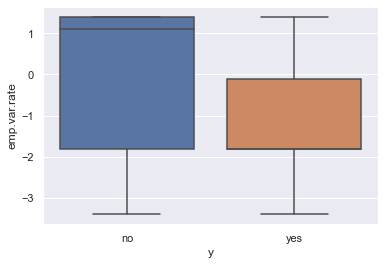

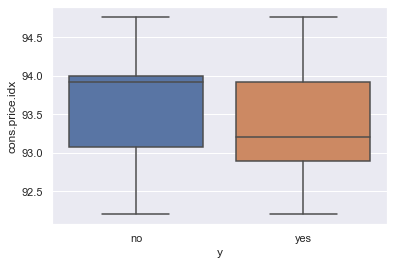

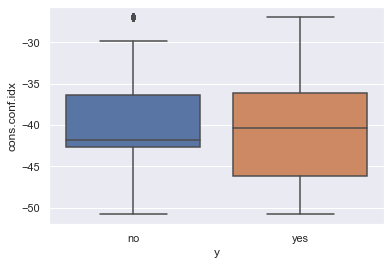

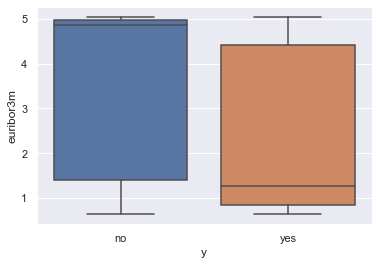

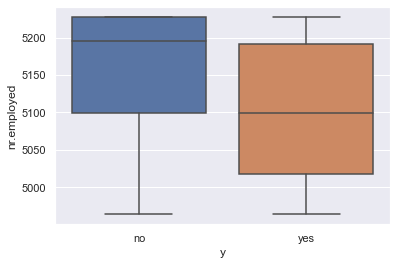

In [12]:
y1 = df['y']

for i in num_columns:
  sns.boxplot(x = y1,y = i,data = df)
  plt.show();

In [13]:
y1 = y1.values

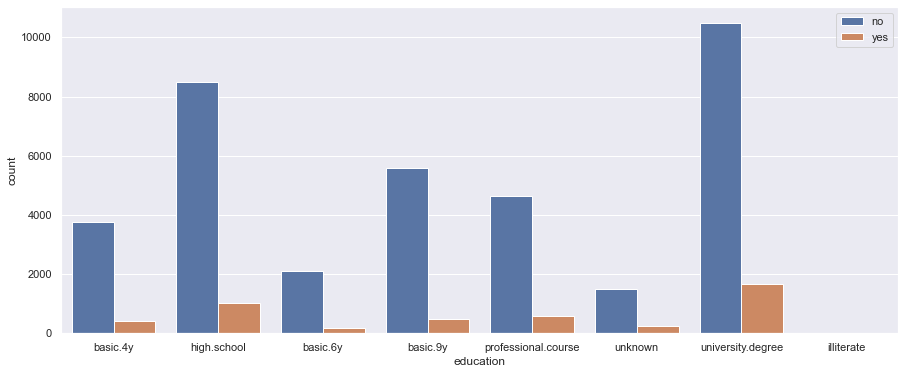

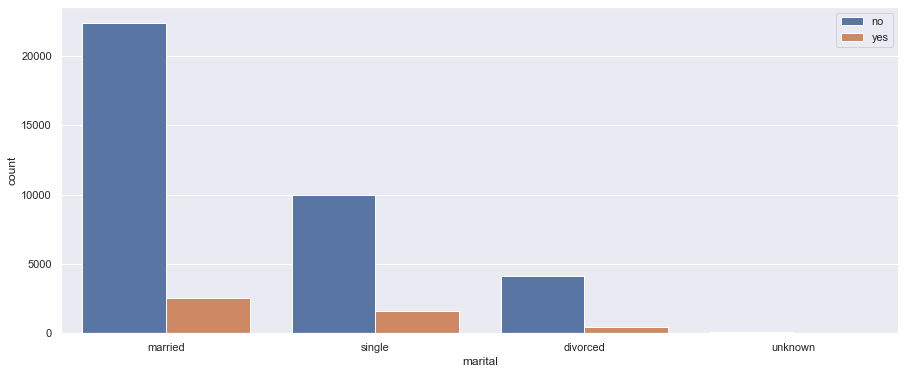

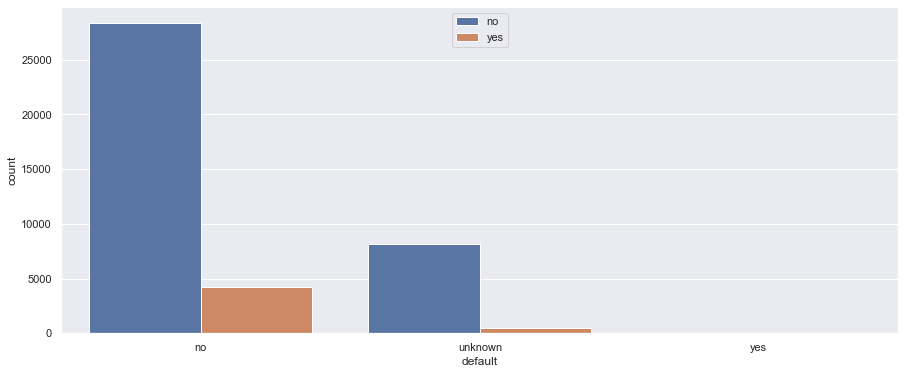

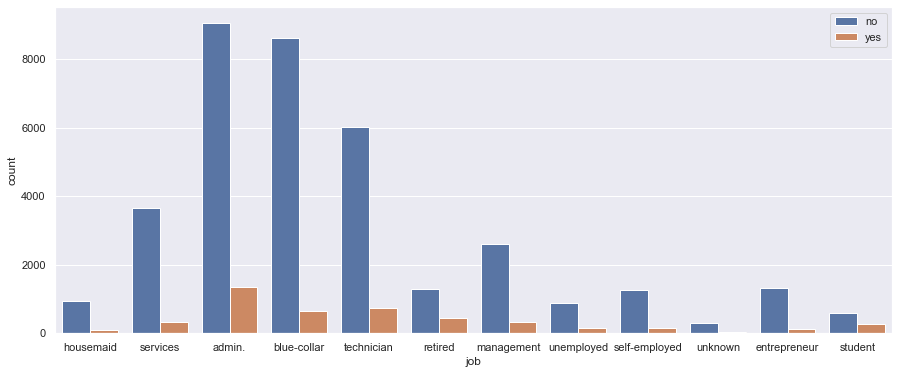

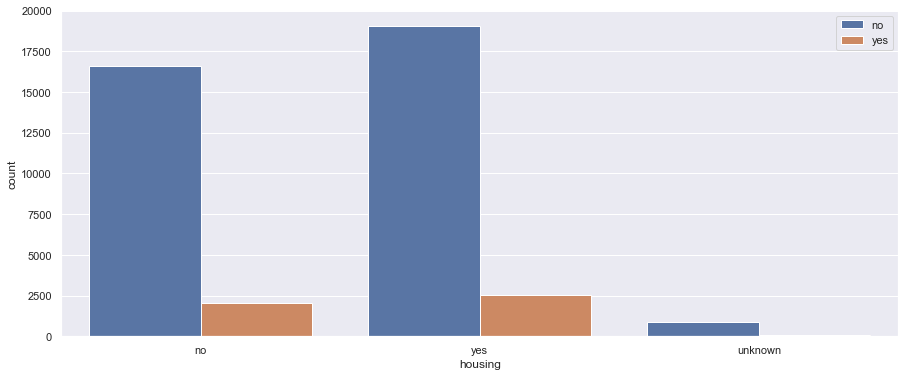

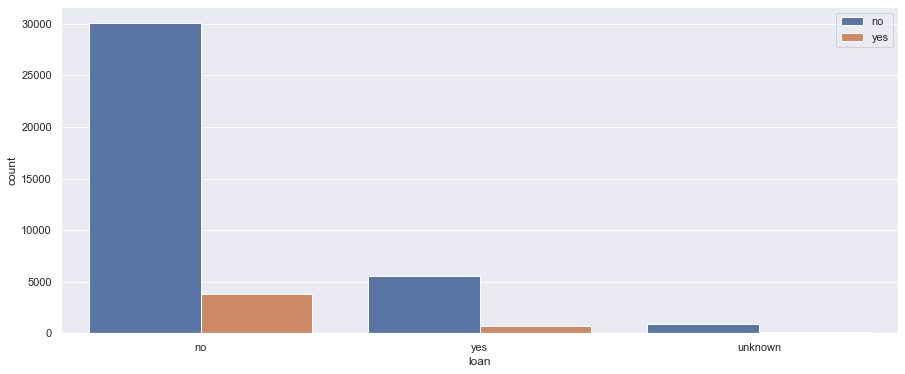

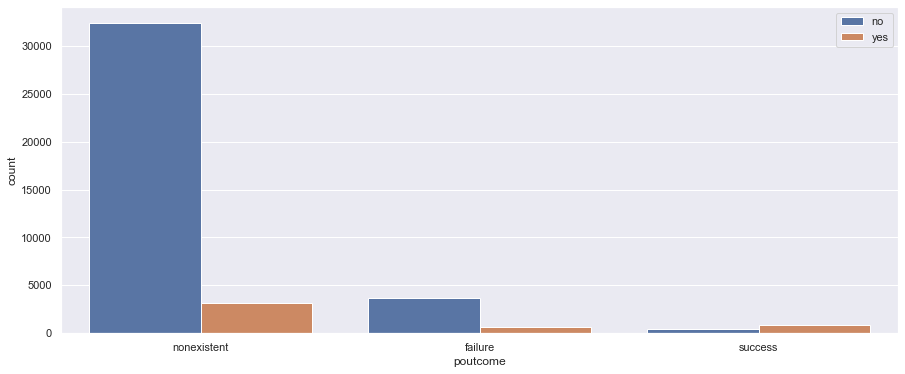

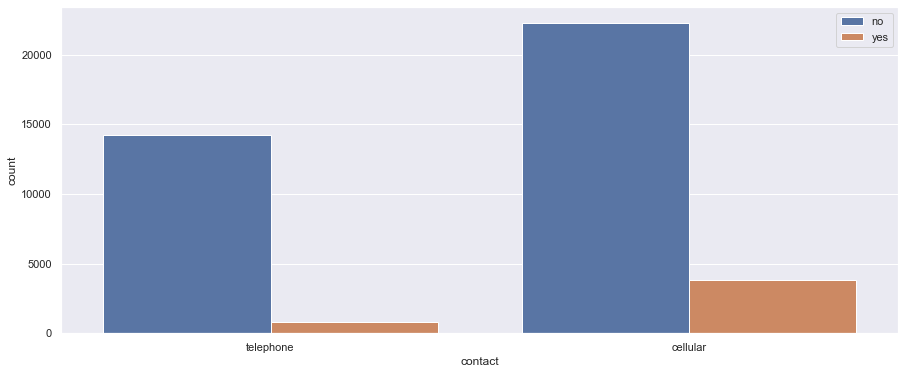

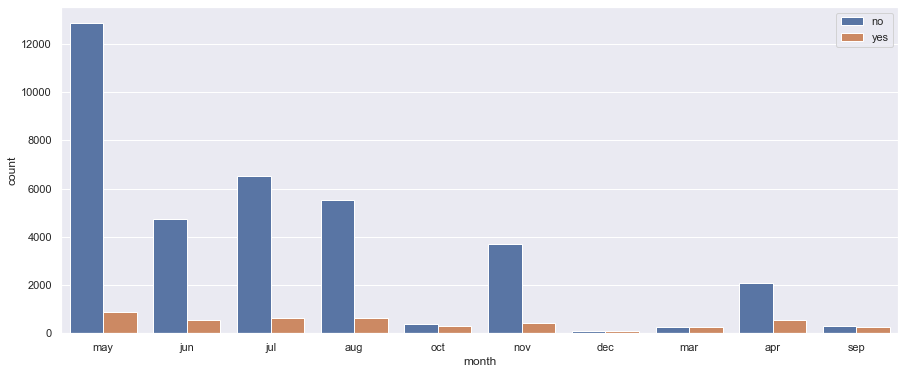

In [14]:
#Exploratory Data Analysis for categorical variable

for i in cat_columns:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=i, hue=y1, data=df)
    plt.show()

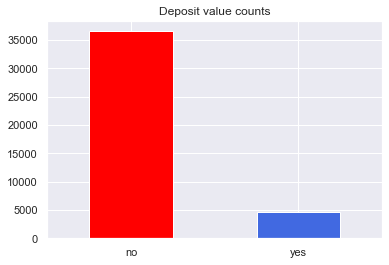

In [15]:
value_counts = df['y'].value_counts()

value_counts.plot.bar(title = 'Deposit value counts', color=colors, rot=0);

In [16]:
df1 = pd.read_csv('./bank-additional-full.csv', sep=';')

In [17]:
df1['y'] = pd.factorize(df['y'])[0]
df1['education'] = pd.factorize(df['education'])[0]
df1['job'] = pd.factorize(df['job'])[0]
df1['housing'] = pd.factorize(df['housing'])[0]
df1['loan'] = pd.factorize(df['loan'])[0]
df1['marital'] = pd.factorize(df['marital'])[0]
df1['default'] = pd.factorize(df['default'])[0]
df1['contact'] = pd.factorize(df['contact'])[0]
df1['day_of_week'] = pd.factorize(df['day_of_week'])[0]
df1['poutcome'] = pd.factorize(df['poutcome'])[0]
df1['month'] = pd.factorize(df['month'])[0]

In [18]:
df1.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   56    0        0          0        0        0     0        0      0   
1   57    1        0          1        1        0     0        0      0   
2   37    1        0          1        0        1     0        0      0   
3   40    2        0          2        0        0     0        0      0   
4   56    1        0          1        0        0     1        0      0   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...         1    999         0         0           1.1   
1            0  ...         1    999         0         0           1.1   
2            0  ...         1    999         0         0           1.1   
3            0  ...         1    999         0         0           1.1   
4            0  ...         1    999         0         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

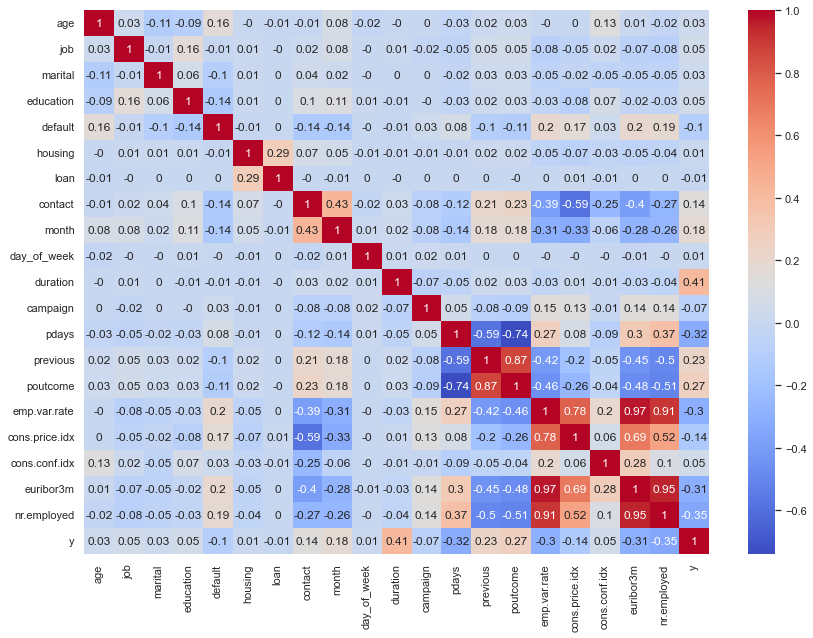

In [19]:
plt.figure(figsize=(14,10))
c= df1.corr().round(2)
sns.heatmap(c, cmap="coolwarm",annot=True);

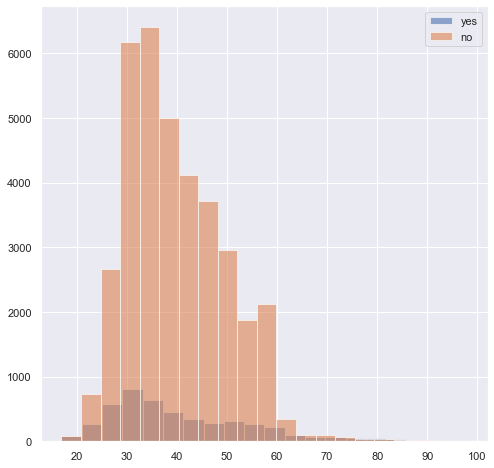

In [20]:
plt.figure(figsize=(8, 8))

plt.hist(df[df["y"]=='yes']['age'].reset_index(drop=True), alpha=0.6, label='yes', bins=20)
plt.hist(df[df["y"]=='no']['age'].reset_index(drop=True), alpha=0.6, label='no', bins =20)

plt.legend()
plt.show()

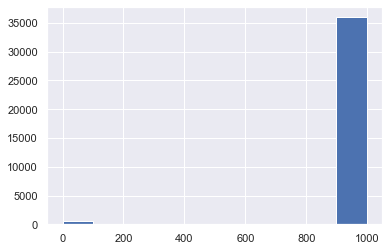

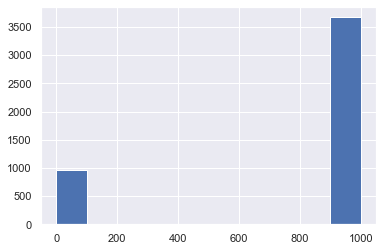

In [21]:
plt.hist(df[df['y'] == 'no']['pdays'])
plt.show()
plt.hist(df[df['y'] == 'yes']['pdays'])
plt.show()
# df[df['y'] == 1]

In [22]:
import plotly.express as px 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(df1)
pca = PCA(n_components=2) 
components = pca.fit_transform(X) 
fig = px.scatter(components, x=0, y=1, color=df1['y']) 
fig.show()

In [24]:
sns.set()

ALGORITHM_NAME = 'lda'
X = df1.iloc[:,0:20]
y = df1.iloc[:,20]

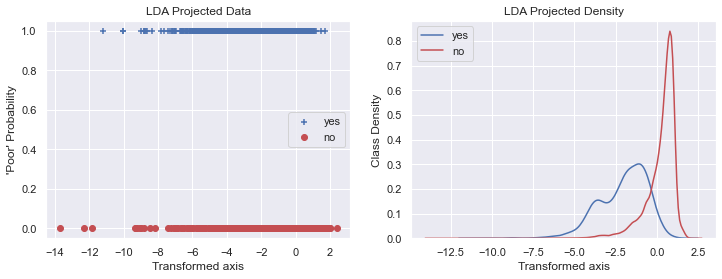

In [25]:
model = LinearDiscriminantAnalysis()
X_lda = model.fit(X, y).transform(X)

mask = (y == 1)
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].scatter(X_lda[mask], y[mask], color='b', marker='+', label='yes')
axes[0].scatter(X_lda[~mask], y[~mask], color='r', marker='o', label='no')
axes[0].set_title('LDA Projected Data')
axes[0].set_xlabel('Transformed axis')
axes[0].set_ylabel('\'Poor\' Probability')
axes[0].legend()

sns.kdeplot(np.ravel(X_lda[mask]), color='b', ax=axes[1], label='yes')
sns.kdeplot(np.ravel(X_lda[~mask]), color='r', ax=axes[1], label='no')
axes[1].set_title('LDA Projected Density')
axes[1].set_xlabel('Transformed axis')
axes[1].set_ylabel('Class Density')
axes[1].legend()
plt.show()

In [28]:
def get_corrs_df(X, model):
    """ For a given feature matrix and LDA model, return
        the correlation of the LDA transformation and
        each feature. Also return the absolute value of
        the correlation.
    """
    X_lda = (model.transform(X)
                  .flatten())
    
    # extract single value from 2x2 correlation matrix
    calc_corr = lambda col: np.corrcoef(col, X_lda)[0, 1]
    
    corrs = (X.apply(calc_corr, axis=0)
               .to_frame())
    corrs.columns = ['correlation']
    
    # add absolute value column
    corrs['abs'] = corrs.correlation.apply(abs)
    
    return corrs.sort_values('abs', ascending=False)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

corrs = get_corrs_df(X_train, model)
feats = corrs[corrs['abs'] > 0.15].index.values

In [30]:
corrs

correlation       abs
duration          -0.663519  0.663519
nr.employed        0.617876  0.617876
pdays              0.577982  0.577982
euribor3m          0.537653  0.537653
emp.var.rate       0.521136  0.521136
poutcome          -0.484184  0.484184
previous          -0.408123  0.408123
month             -0.302511  0.302511
contact           -0.250010  0.250010
cons.price.idx     0.234639  0.234639
default            0.171610  0.171610
campaign           0.115780  0.115780
cons.conf.idx     -0.097852  0.097852
education         -0.087947  0.087947
job               -0.086050  0.086050
age               -0.053536  0.053536
marital           -0.046111  0.046111
loan               0.027881  0.027881
day_of_week       -0.009818  0.009818
housing           -0.005210  0.005210

In [31]:
X_train[feats]

duration  nr.employed  pdays  euribor3m  emp.var.rate  poutcome  \
18827       104       5228.1    999      4.970           1.4         0   
27885        58       5099.1    999      1.556          -1.8         0   
905         245       5191.0    999      4.856           1.1         0   
34947       148       5099.1    999      1.250          -1.8         0   
18098       244       5228.1    999      4.963           1.4         0   
...         ...          ...    ...        ...           ...       ...   
20757       559       5228.1    999      4.965           1.4         0   
32103       166       5099.1    999      1.313          -1.8         0   
30403       427       5099.1    999      1.365          -1.8         0   
21243       111       5228.1    999      4.963           1.4         0   
2732        132       5191.0    999      4.859           1.1         0   

       previous  month  contact  cons.price.idx  default  
18827         0      3        1          93.444        0  
27885         0      7        0          92.843        0  
905           0      0        0          93.994        0  
34947         0      0        1          92.893        0  
18098         0      2        1          93.918        1  
...         ...    ...      ...             ...      ...  
20757         0      3        1          93.444        0  
32103         0      0        1          92.893        0  
30403         0      8        1          93.075        0  
21243         0      3        1          93.444        0  
2732          0      0        0          93.994        0  

[8237 rows x 11 columns]

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

max_score = 0
f1 = 1
f1_scores = []
f1_threshold = 0.8
X_train = X_train[feats]
X_test = X_test[feats]

while (f1 > f1_threshold) & (X_train.shape[1] >= 1):
    # Fit the model
    estimator = LinearDiscriminantAnalysis()
    parameters = {'solver': ['svd']}
    model = GridSearchCV(estimator, parameters).fit(X_train, y_train)
    
    # Get feature correlations
    corrs = get_corrs_df(X_train, model)
    feats = corrs.sort_values('abs', ascending=False).index.values

    # Run the model
    y_pred = model.predict(X_test[X_train.columns])
    y_prob = model.predict_proba(X_test[X_train.columns])[:,1]

    # Compare f1 score to threshold
    f1 = f1_score(y_test, y_pred)
    if f1 > max_score:
        max_score = f1
        best_feats = X_train.columns
        
    if f1 > f1_threshold:
        # Drop feature with lowest coefficient
        X_train.drop(feats[-1], axis=1, inplace=True)
        print("n: {}, f1: {}, lowest coef: {}".format(len(feats), f1, feats[-1]))

In [33]:
feats

array(['duration', 'nr.employed', 'pdays', 'euribor3m', 'emp.var.rate',
       'poutcome', 'previous', 'month', 'cons.price.idx', 'contact',
       'default'], dtype=object)

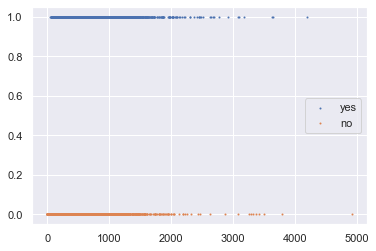

In [34]:
plt.scatter(X['duration'][mask], y[mask], label='yes', s = 1)
plt.scatter(X['duration'][~mask], y[~mask], label='no', s = 1)
plt.legend()
plt.show()

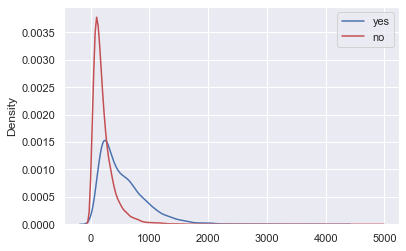

In [40]:
sns.kdeplot(np.ravel(X['duration'][mask]), color='b', label='yes')
sns.kdeplot(np.ravel(X['duration'][~mask]), color='r', label='no')
plt.legend()
plt.show()

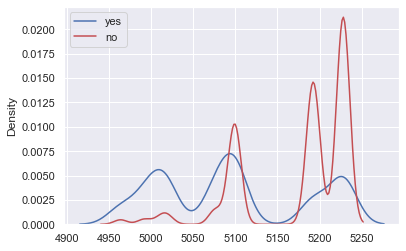

In [41]:
sns.kdeplot(np.ravel(X['nr.employed'][mask]), color='b', label='yes')
sns.kdeplot(np.ravel(X['nr.employed'][~mask]), color='r', label='no')
plt.legend()
plt.show()

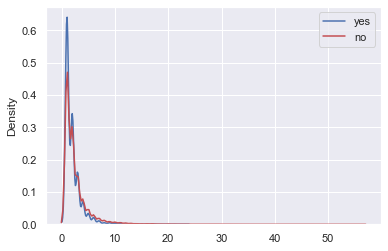

In [39]:
sns.kdeplot(np.ravel(X['campaign'][mask]), color='b', label='yes')
sns.kdeplot(np.ravel(X['campaign'][~mask]), color='r', label='no')
plt.legend()
plt.show()

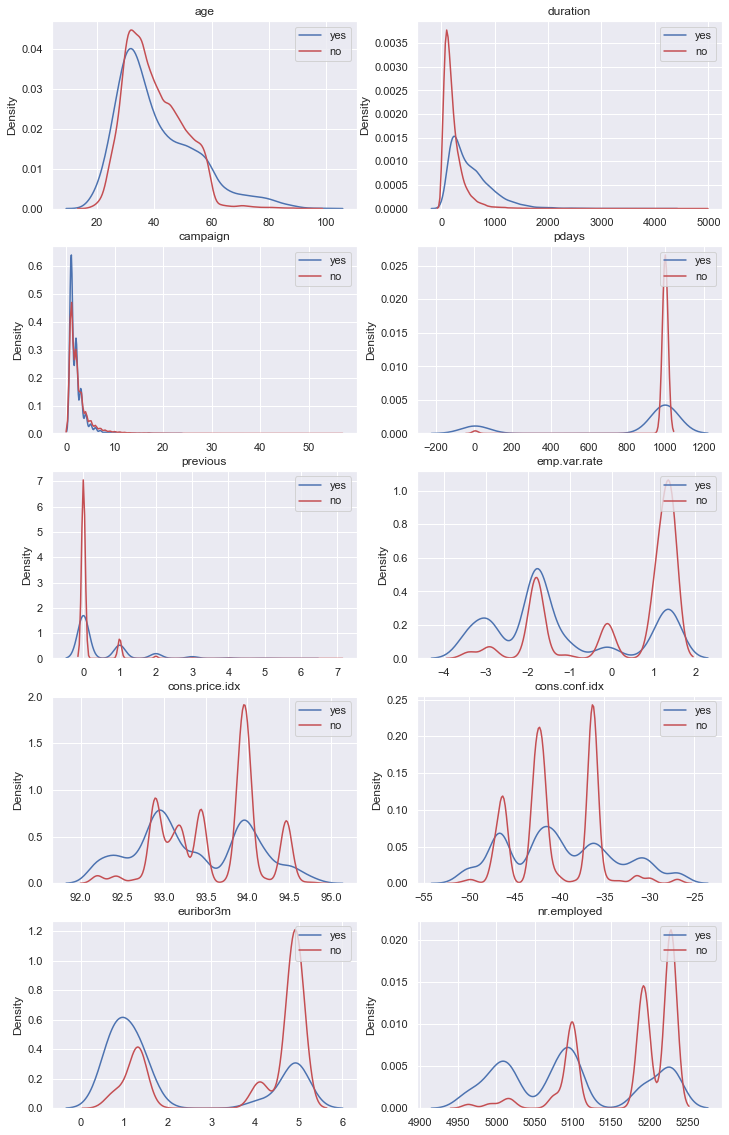

In [37]:

fig, axs = plt.subplots(5, 2, sharex=False, sharey=False, figsize=(12, 20))

counter = 0
for c in num_columns:
    
    trace_x = counter // 2
    trace_y = counter % 2
    
    sns.kdeplot(ax=axs[trace_x, trace_y], x=np.ravel(X[c][mask]), color='b', label='yes')
    sns.kdeplot(ax=axs[trace_x, trace_y], x=np.ravel(X[c][~mask]), color='r', label='no')
    
    axs[trace_x, trace_y].set_title(c)
    axs[trace_x, trace_y].legend(loc="upper right")
    counter += 1

plt.show()

# for c in num_columns:
#     sns.kdeplot(np.ravel(X[c][mask]), color='b', label='yes')
#     sns.kdeplot(np.ravel(X[c][~mask]), color='r', label='no')
#     plt.title(c)
#     plt.legend()
#     plt.show()

In [43]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [47]:
sum(X['pdays'] == 999)

39673